# Exploratory Data Analysis of COVID-19 Cases

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [47]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Vishnu\Downloads\corona_cases\country_wise_latest.csv')

# Renaming columns to replace spaces with underscores
df.rename(columns=lambda x: x.strip().replace(' ', '_'), inplace=True)

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle missing values if needed
df.fillna(0, inplace=True)

# Exploratory Data Analysis (EDA)
print(df.head())
print(df.info())
print(df.describe())

  Country/Region  Confirmed  Deaths  Recovered  Active  New_cases  New_deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New_recovered  Deaths_/_100_Cases  Recovered_/_100_Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths_/_100_Recovered  Confirmed_last_week  1_week_change  \
0                    5.04                35526            737   
1   

In [59]:
# Visualizations

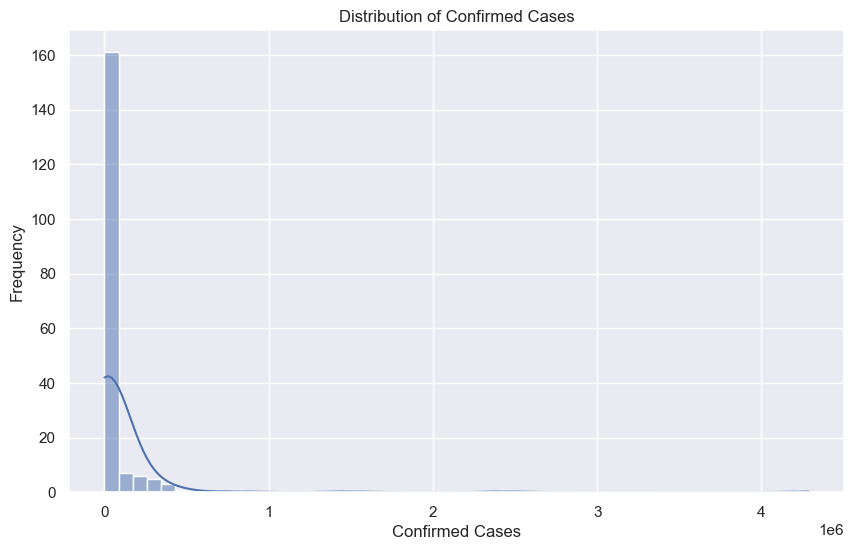

In [49]:

# Distribution of Confirmed Cases

plt.figure(figsize=(10, 6))
sns.histplot(df['Confirmed'], bins=50, kde=True)
plt.title('Distribution of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Frequency')
plt.show()


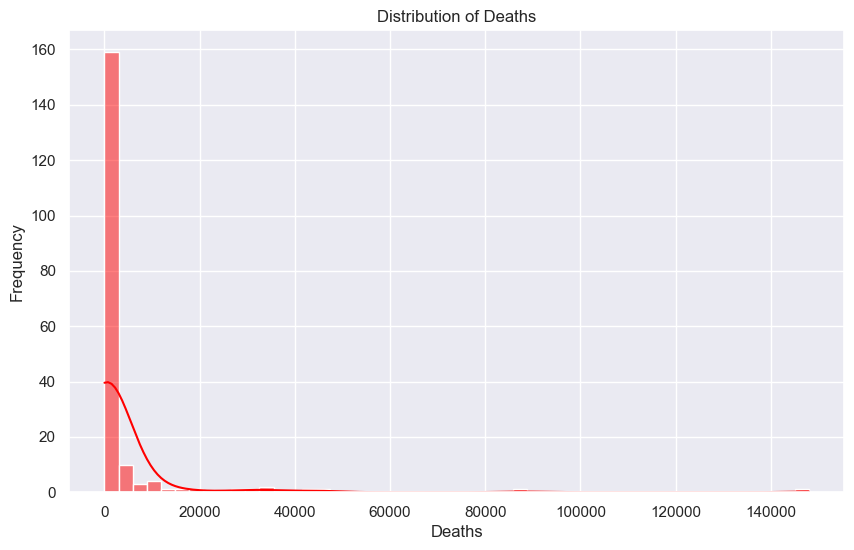

In [51]:

# Histogram: Distribution of Deaths
plt.figure(figsize=(10, 6))
sns.histplot(df['Deaths'], bins=50, kde=True, color='red')
plt.title('Distribution of Deaths')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.show()

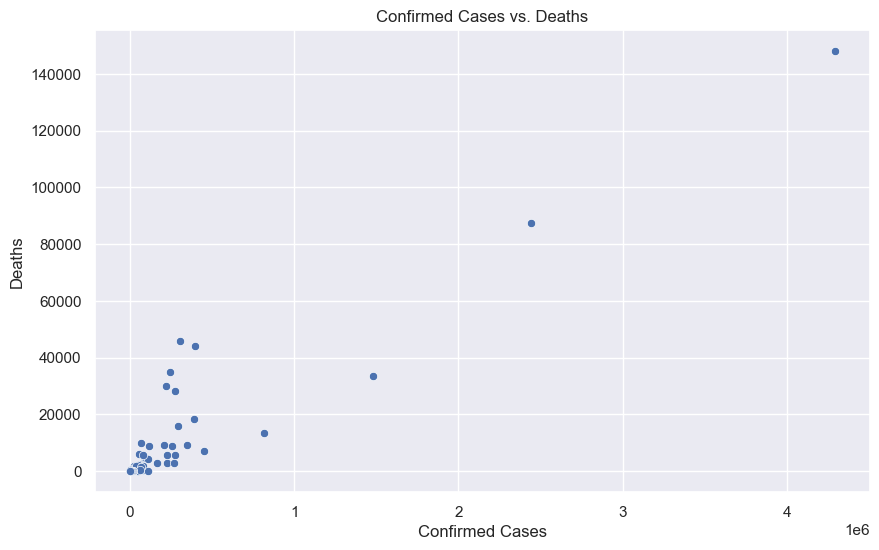

In [53]:
# Confirmed Cases vs. Deaths

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.title('Confirmed Cases vs. Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()

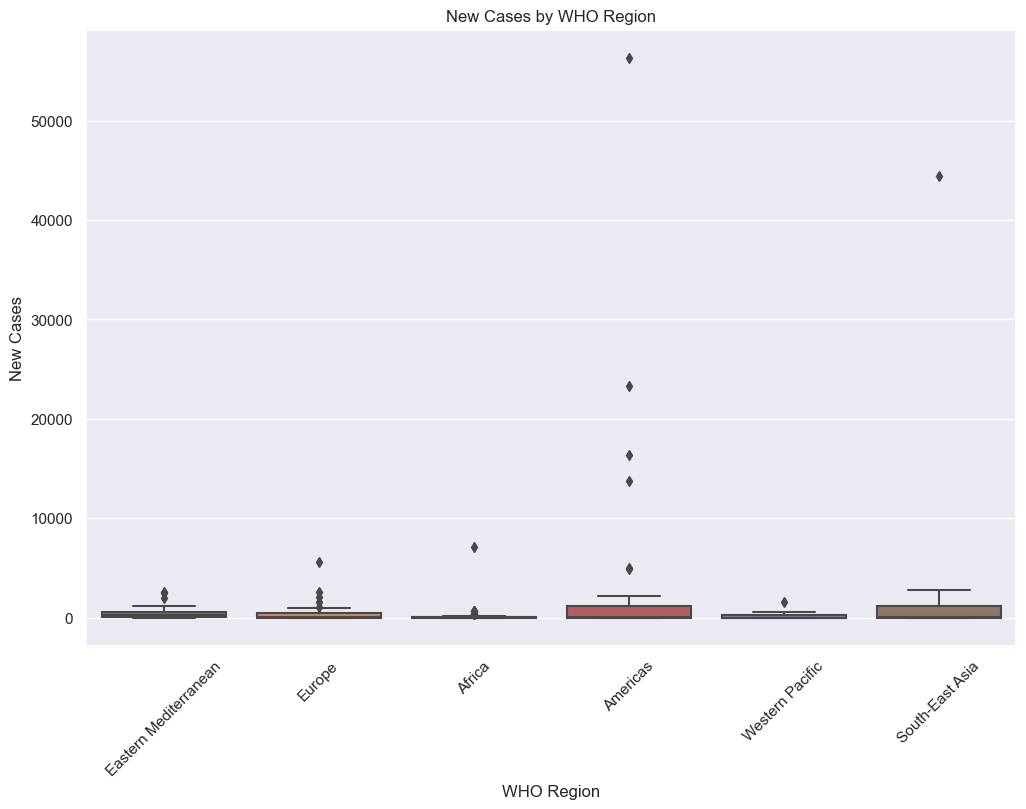

In [55]:
# New Cases by WHO Region

plt.figure(figsize=(12, 8))
sns.boxplot(x='WHO_Region', y='New_cases', data=df)
plt.title('New Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()

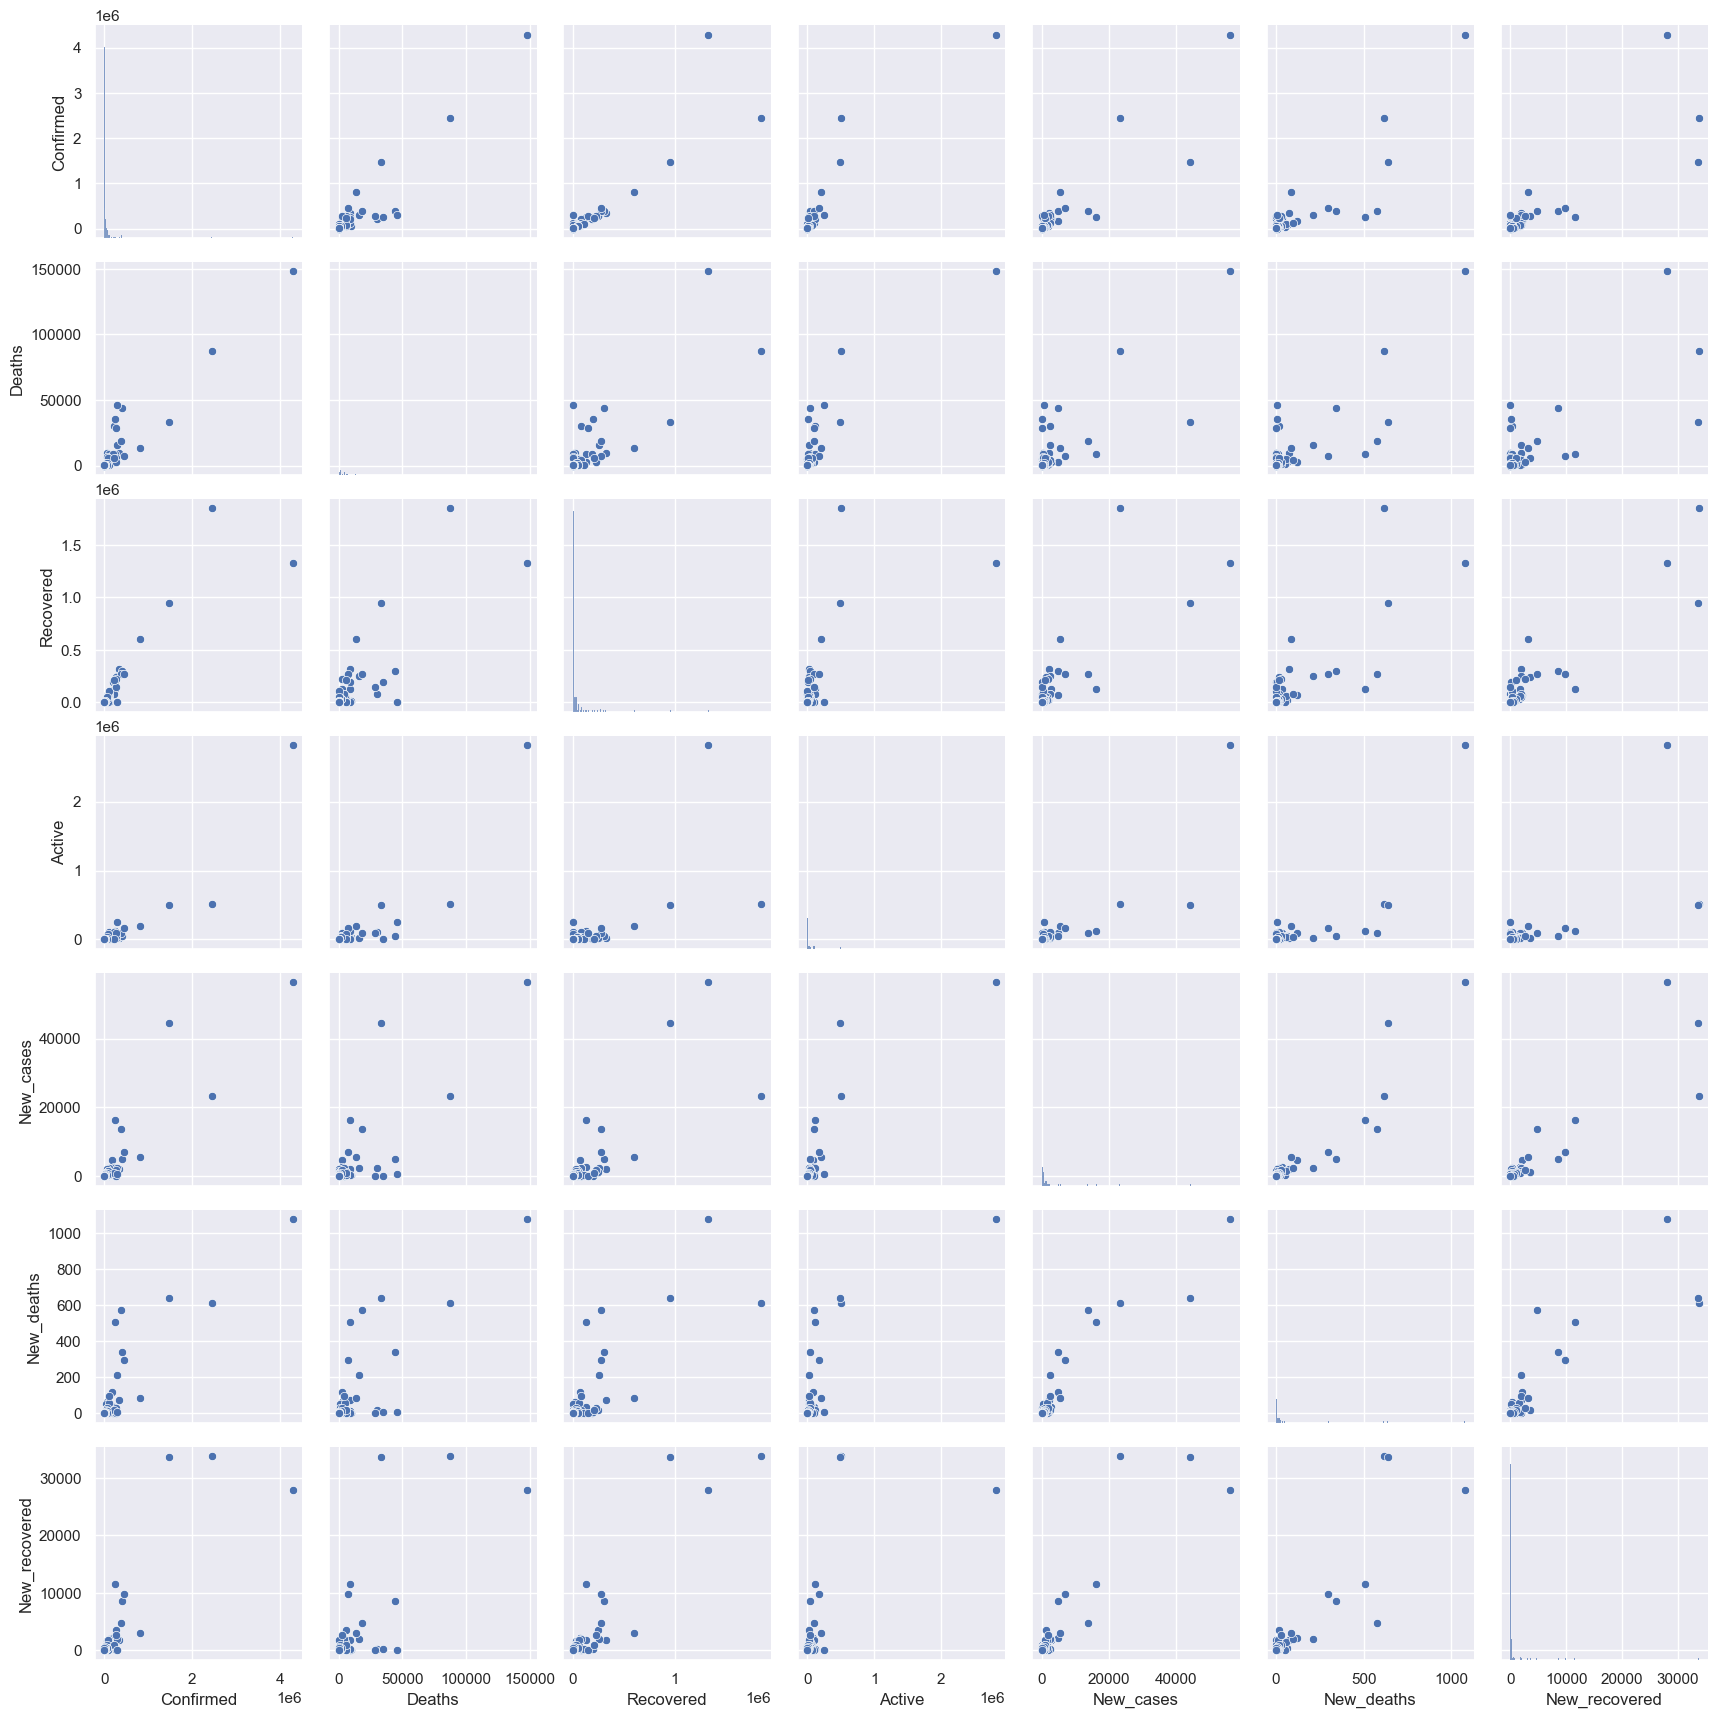

In [57]:
# Pairplot of various columns

sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New_cases', 'New_deaths', 'New_recovered']])
plt.show()

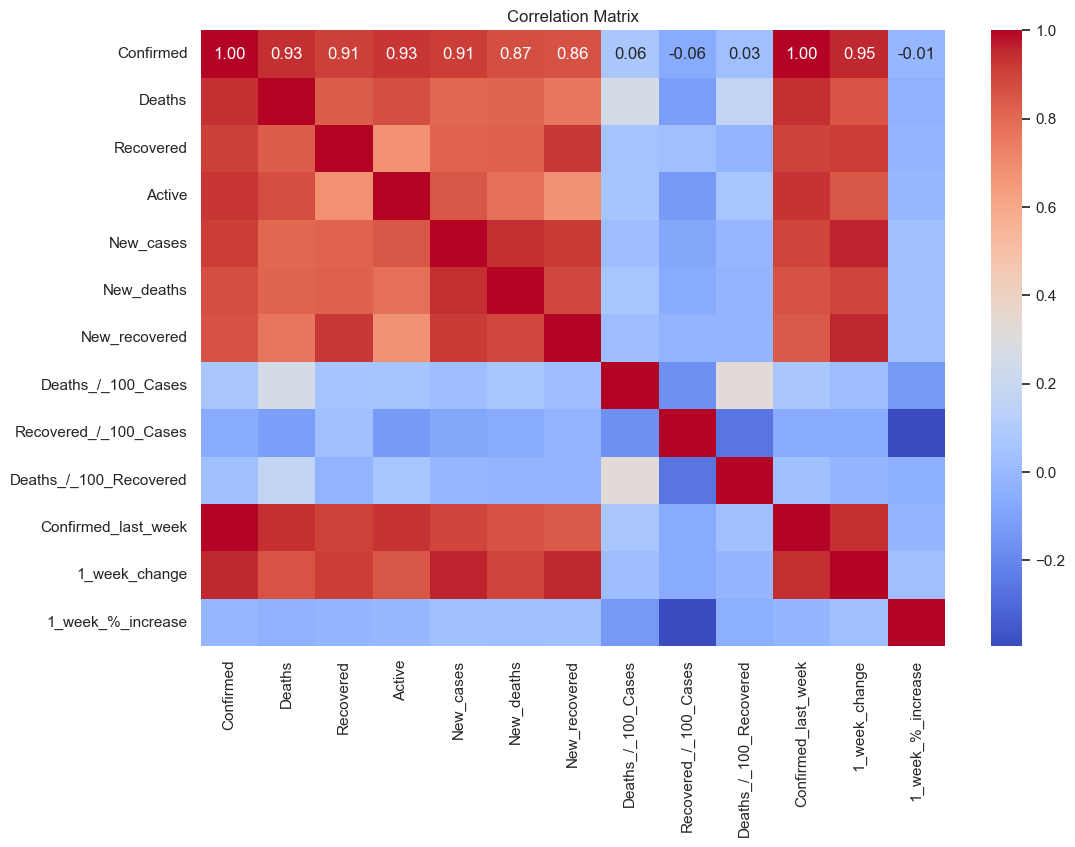

In [58]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [61]:
# Aggregate Data
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
print(f'Total Confirmed Cases: {total_confirmed}')
print(f'Total Deaths: {total_deaths}')
print(f'Total Recovered: {total_recovered}')

death_rate = (total_deaths / total_confirmed) * 100
recovery_rate = (total_recovered / total_confirmed) * 100
print(f'Death Rate: {death_rate:.2f}%')
print(f'Recovery Rate: {recovery_rate:.2f}%')

Total Confirmed Cases: 16480485
Total Deaths: 654036
Total Recovered: 9468087
Death Rate: 3.97%
Recovery Rate: 57.45%


In [63]:
# Top 10 Countries with Highest Confirmed Cases
top_10_countries = df.nlargest(10, 'Confirmed')[['Country/Region', 'Confirmed']]
print('Top 10 Countries with Highest Confirmed Cases:')
print(top_10_countries)

Top 10 Countries with Highest Confirmed Cases:
     Country/Region  Confirmed
173              US    4290259
23           Brazil    2442375
79            India    1480073
138          Russia     816680
154    South Africa     452529
111          Mexico     395489
132            Peru     389717
35            Chile     347923
177  United Kingdom     301708
81             Iran     293606


In [65]:
# Aggregate New Cases Data
total_new_cases = df['New_cases'].sum()
total_new_deaths = df['New_deaths'].sum()
total_new_recovered = df['New_recovered'].sum()
print(f'Total New Cases: {total_new_cases}')
print(f'Total New Deaths: {total_new_deaths}')
print(f'Total New Recovered: {total_new_recovered}')

Total New Cases: 228693
Total New Deaths: 5415
Total New Recovered: 174623


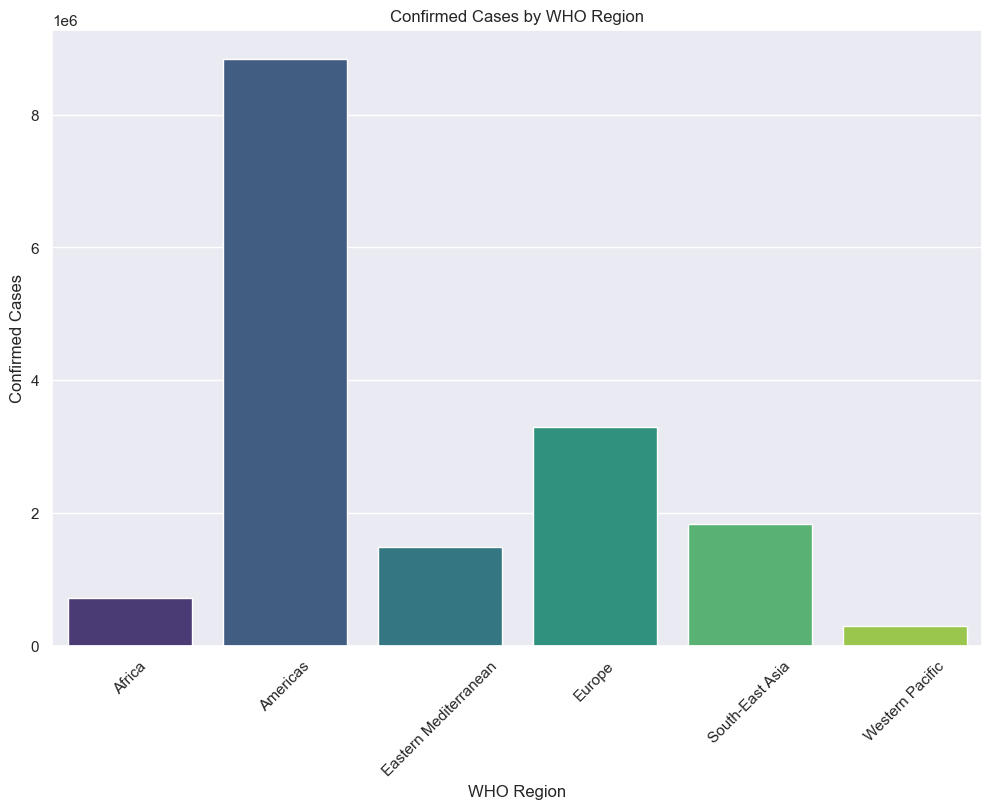

In [71]:
# Grouping the data by WHO Region and summing the Confirmed cases
region_confirmed = df.groupby('WHO_Region')['Confirmed'].sum().reset_index()

# Visualizing WHO Region Data
plt.figure(figsize=(12, 8))
sns.barplot(x='WHO_Region', y='Confirmed', data=region_confirmed, palette='viridis')
plt.title('Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

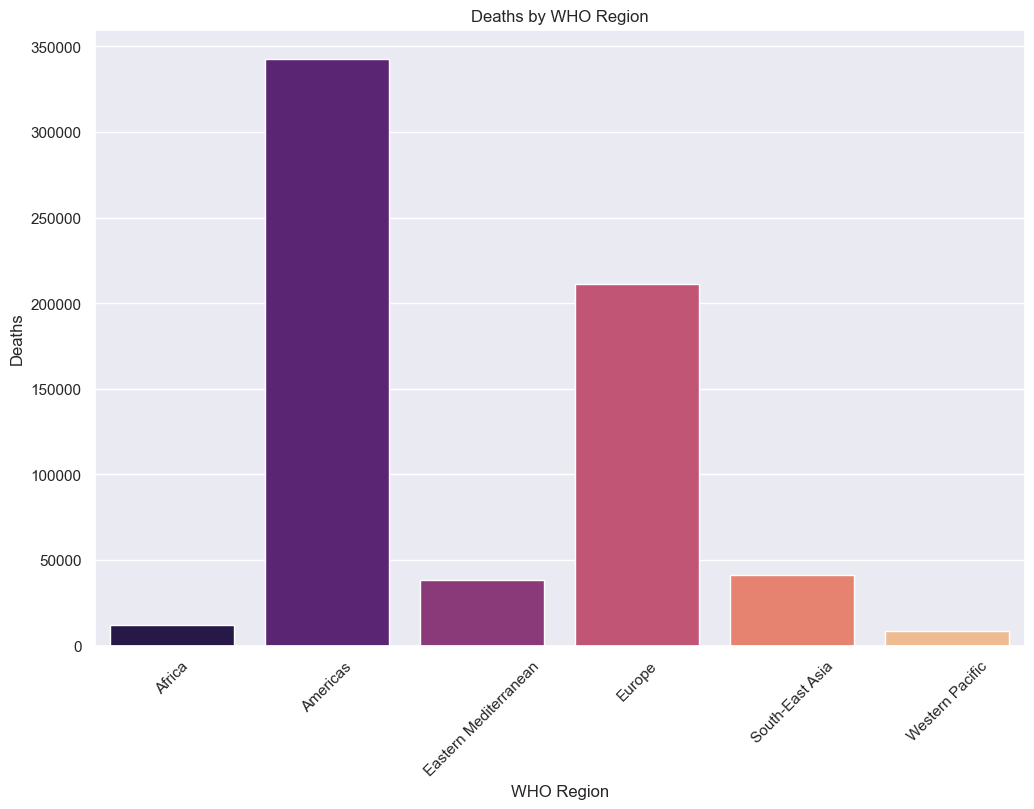

In [75]:
# Grouping the data by WHO Region and summing the Deaths
region_deaths = df.groupby('WHO_Region')['Deaths'].sum().reset_index()

# Visualizing Deaths by WHO Region
plt.figure(figsize=(12, 8))
sns.barplot(x='WHO_Region', y='Deaths', data=region_deaths, palette='magma')
plt.title('Deaths by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

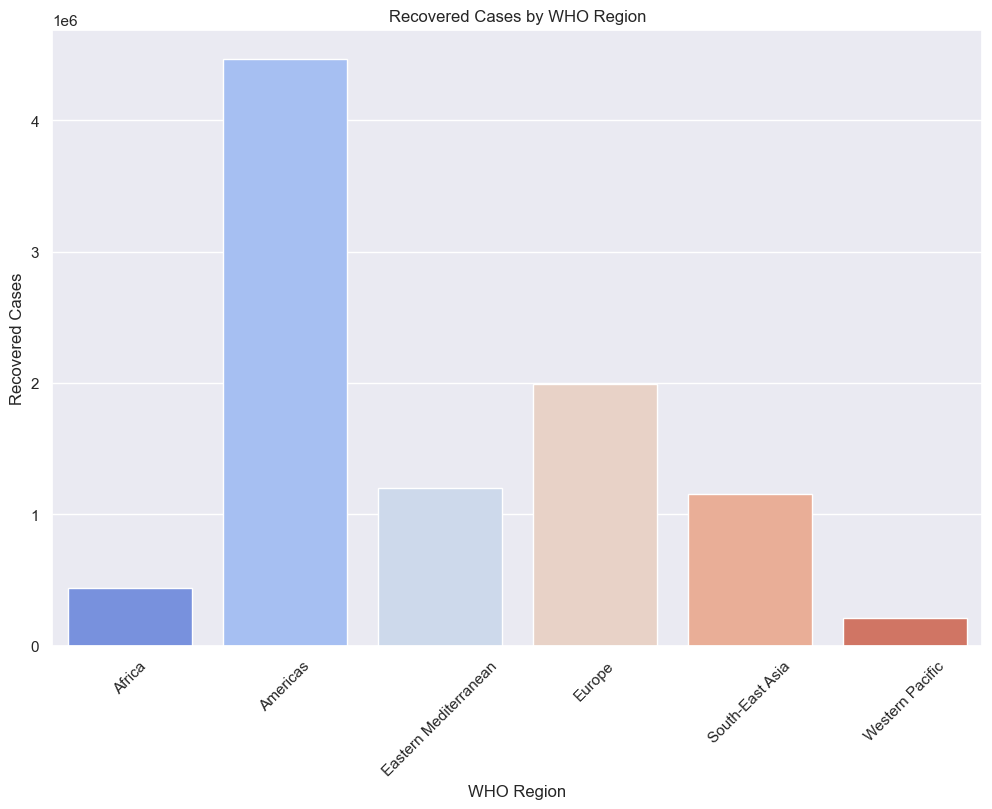

In [77]:
# Grouping the data by WHO Region and summing the Recovered cases
region_recovered = df.groupby('WHO_Region')['Recovered'].sum().reset_index()

# Visualizing Recovered Cases by WHO Region
plt.figure(figsize=(12, 8))
sns.barplot(x='WHO_Region', y='Recovered', data=region_recovered, palette='coolwarm')
plt.title('Recovered Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Recovered Cases')
plt.xticks(rotation=45)
plt.show()

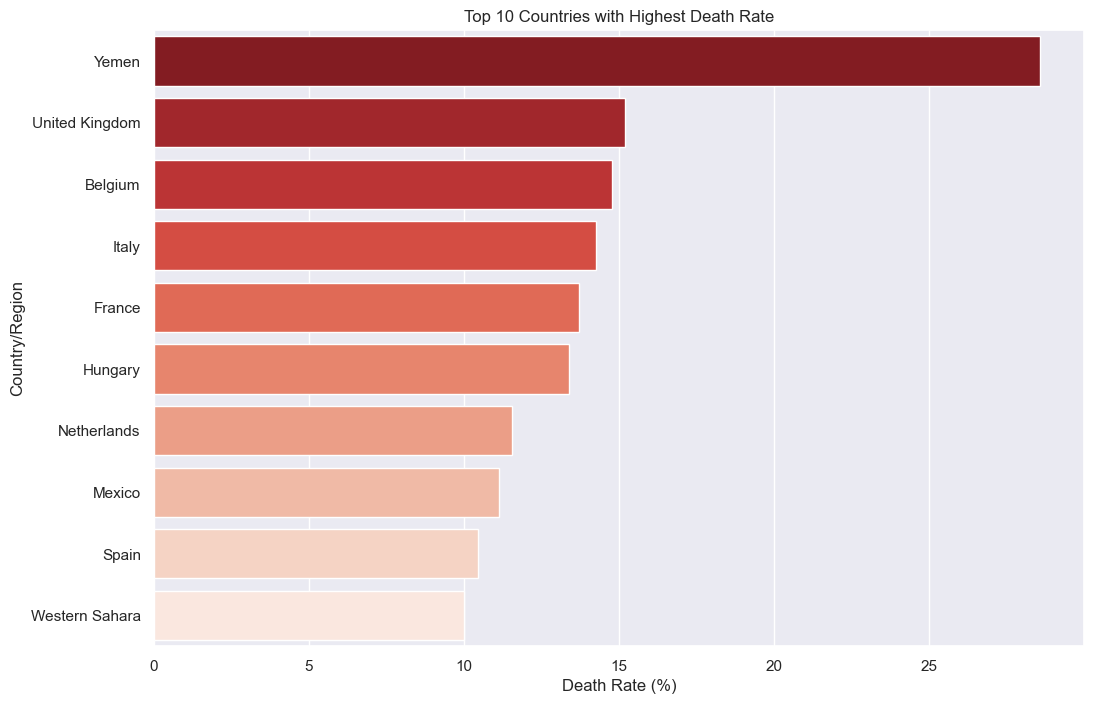

In [79]:
# Calculate Death Rate for each country
df['Death_Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100

# Top 10 Countries with Highest Death Rate
top_10_death_rate = df.nlargest(10, 'Death_Rate (%)')

plt.figure(figsize=(12, 8))
sns.barplot(x='Death_Rate (%)', y='Country/Region', data=top_10_death_rate, palette='Reds_r')
plt.title('Top 10 Countries with Highest Death Rate')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country/Region')
plt.show()


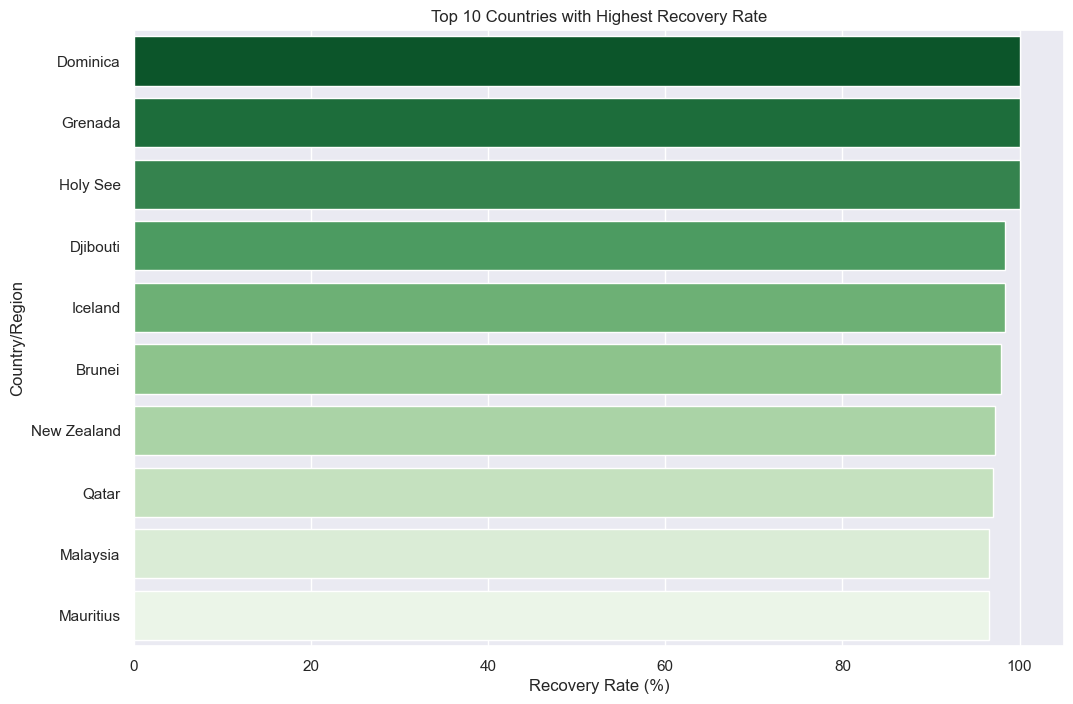

In [81]:
# Calculate Recovery Rate for each country
df['Recovery_Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100

# Top 10 Countries with Highest Recovery Rate
top_10_recovery_rate = df.nlargest(10, 'Recovery_Rate (%)')

plt.figure(figsize=(12, 8))
sns.barplot(x='Recovery_Rate (%)', y='Country/Region', data=top_10_recovery_rate, palette='Greens_r')
plt.title('Top 10 Countries with Highest Recovery Rate')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country/Region')
plt.show()
